In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movierecommenderdataset/movies.csv
/kaggle/input/movierecommenderdataset/ratings.csv


In [2]:
movies_df = pd.read_csv('/kaggle/input/movierecommenderdataset/movies.csv')
ratings_df = pd.read_csv('/kaggle/input/movierecommenderdataset/ratings.csv')

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings_df.userId.nunique()

610

In [10]:
ratings_df.movieId.nunique()

9724

In [11]:
user_count = ratings_df.groupby('userId')['movieId'].count().reset_index()
user_count.columns = ['userId', 'num_ratings']



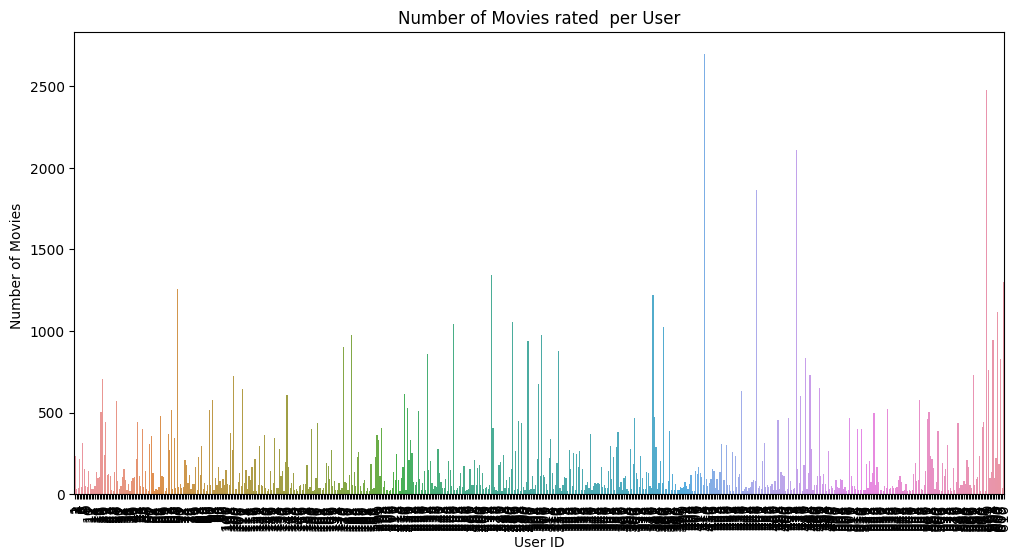

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='userId', y='num_ratings', data=user_count)
plt.title('Number of Movies rated  per User')
plt.xlabel('User ID')
plt.ylabel('Number of Movies ')
plt.xticks(rotation=90)
plt.show()

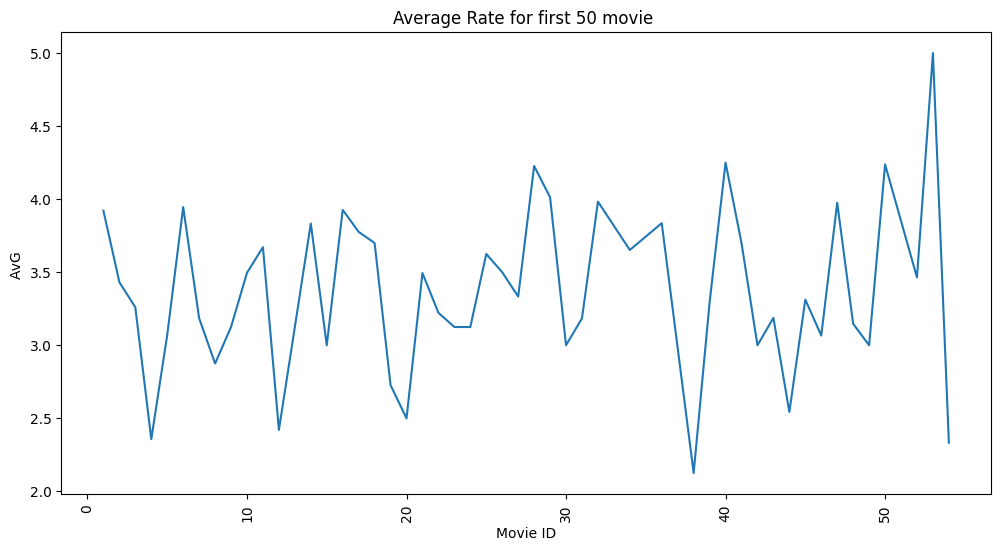

In [13]:
avr = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avr.columns = ['movieId', 'AVG_rate']
sample=avr.head(50)
plt.figure(figsize=(12, 6))
sns.lineplot(x='movieId', y='AVG_rate', data=sample)
plt.title('Average Rate for first 50 movie ')
plt.xlabel('Movie ID')
plt.ylabel('AvG ')
plt.xticks(rotation=90)
plt.show()

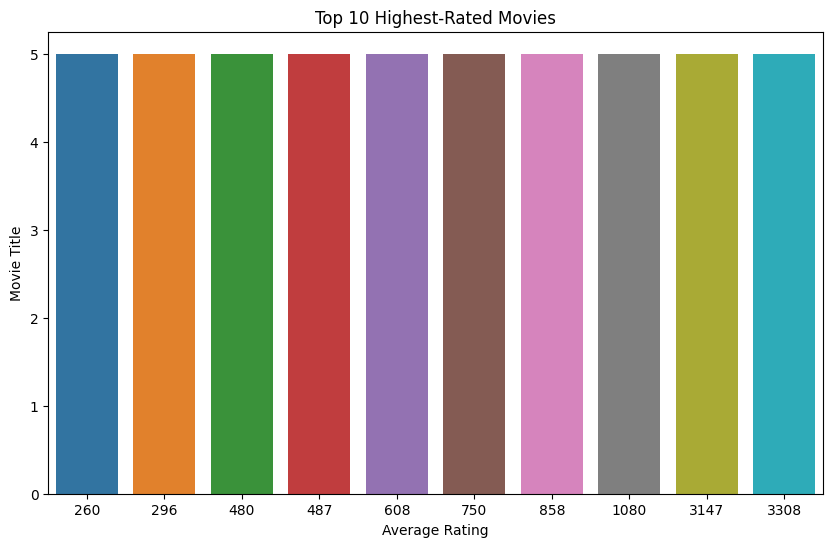

In [14]:

top_movies = ratings_df.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='movieId',y='rating',data=top_movies)
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest-Rated Movies')
plt.show()

In [15]:
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['title'] = movies_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [16]:
df = movies_df.merge(ratings_df, on='movieId')
df.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   year       100818 non-null  object 
 4   userId     100836 non-null  int64  
 5   rating     100836 non-null  float64
 6   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.4+ MB


In [18]:
df.isna().sum()

movieId       0
title         0
genres        0
year         18
userId        0
rating        0
timestamp     0
dtype: int64

In [19]:
movies =df[df['year'].isnull()]
movies.head()

,movieId,title,genres,year,userId,rating,timestamp
81292,40697,Babylon 5,Sci-Fi,NaN,210,4.0,1527266191
81293,40697,Babylon 5,Sci-Fi,NaN,528,0.5,1391736467
99325,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN,209,3.5,1524522239
99326,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN,305,4.5,1533043577
99327,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN,380,3.0,1534176158


In [20]:
df['year'].fillna(df['year'].mode()[0], inplace=True)
df.isna().sum()

movieId      0
title        0
genres       0
year         0
userId       0
rating       0
timestamp    0
dtype: int64

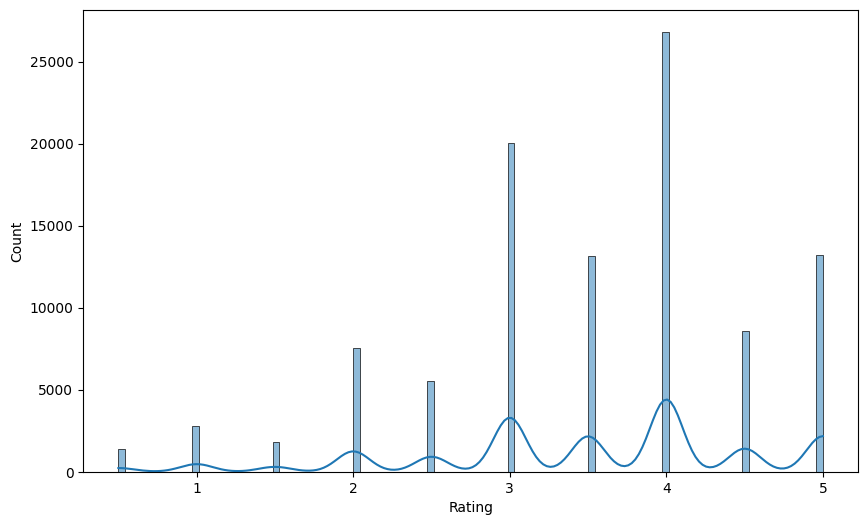

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True)
plt.xlabel('Rating')
plt.show()

In [22]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


Text(0.5, 0, 'Number of Ratings')

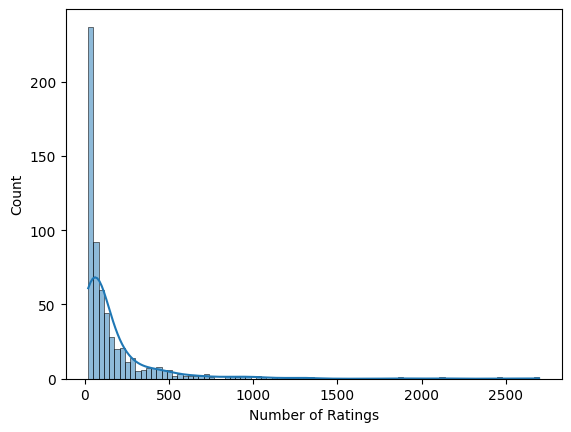

In [23]:
usercounts = df['userId'].value_counts()
sns.histplot(usercounts, kde=True)
plt.xlabel('Number of Ratings')

In [24]:
df['genres'] = df['genres'].str.split('|')


In [25]:
df.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,17,4.5,1305696483


In [26]:
all_genres = [genre for genres in df['genres'] for genre in genres]
unique = list(set(all_genres))


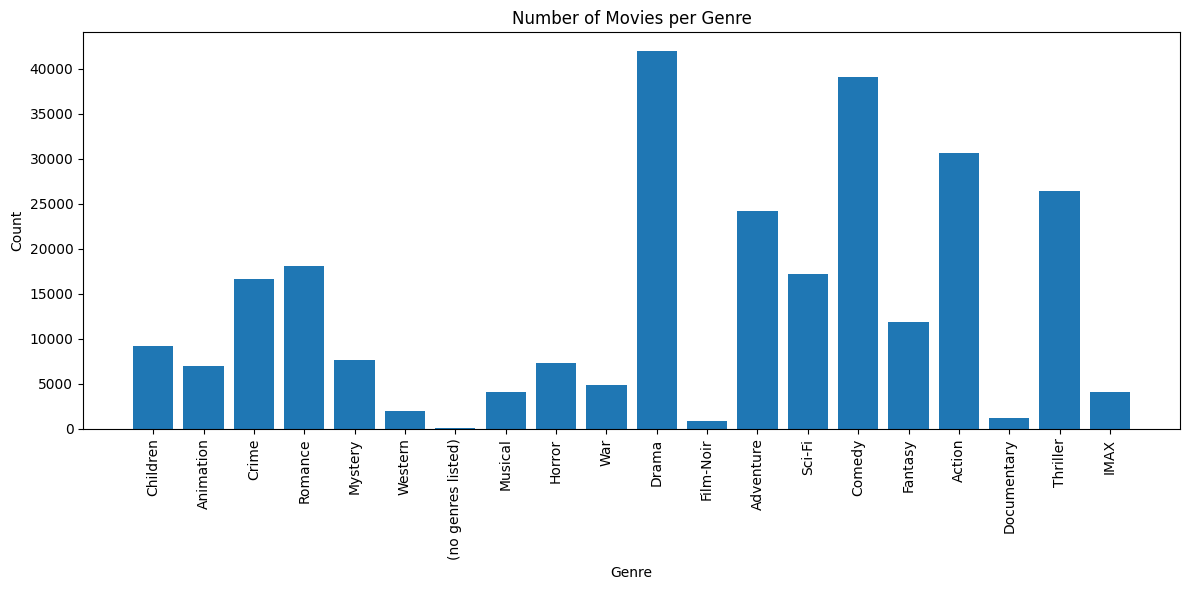

In [27]:
genre_counts = [all_genres.count(genre) for genre in unique]

plt.figure(figsize=(12, 6))
plt.bar(unique, genre_counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


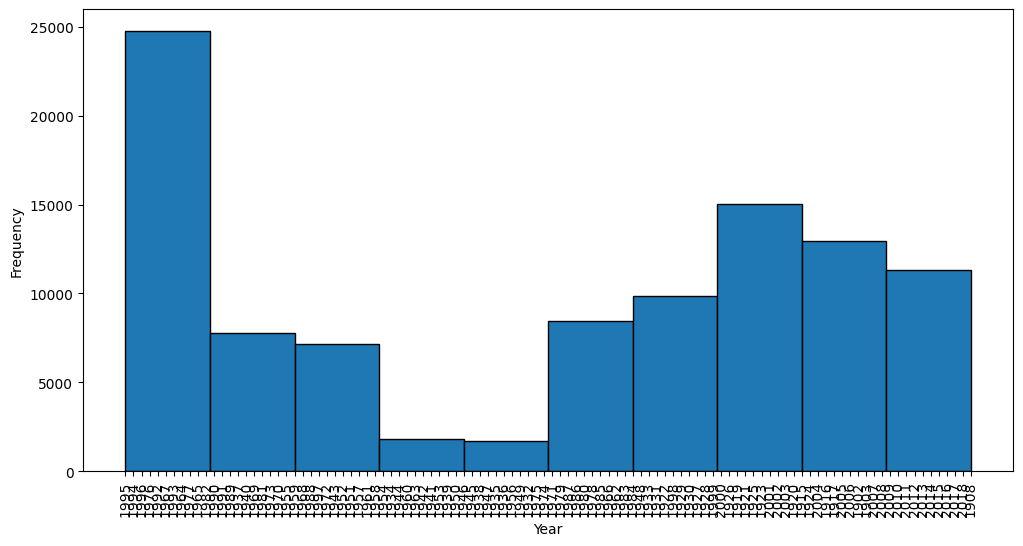

In [38]:
plt.figure(figsize=(12, 6))
plt.hist(df['year'], bins=10, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

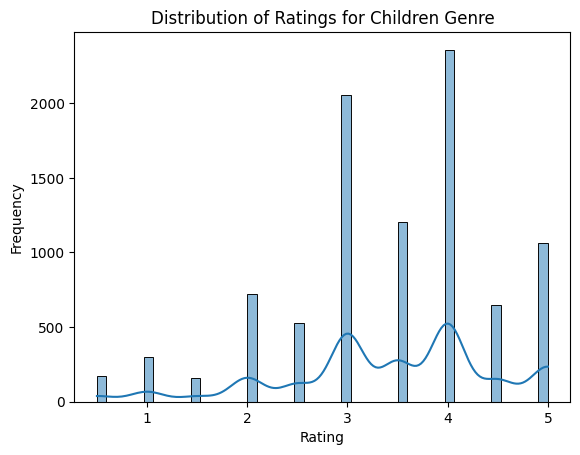

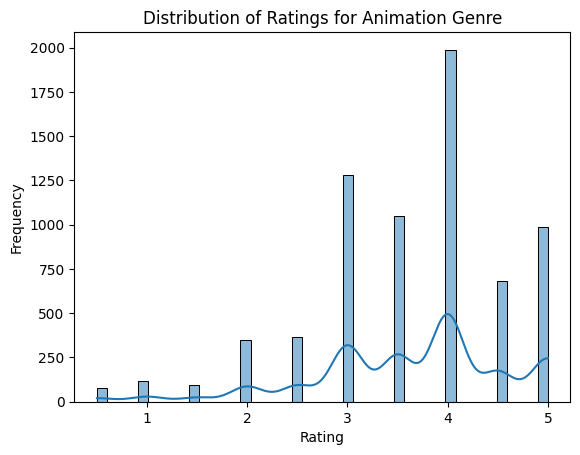

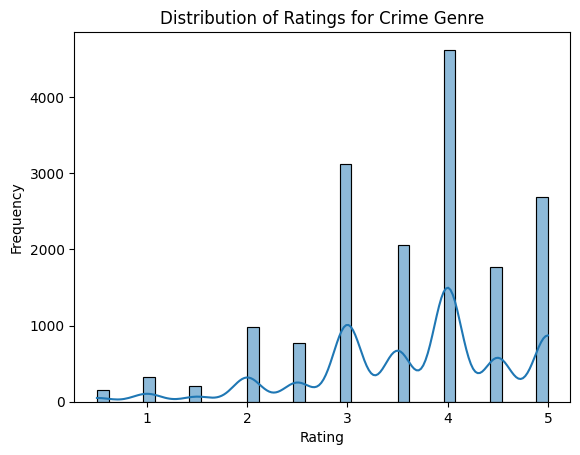

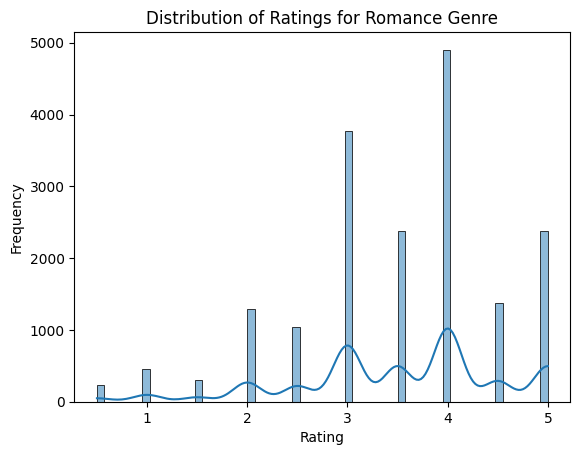

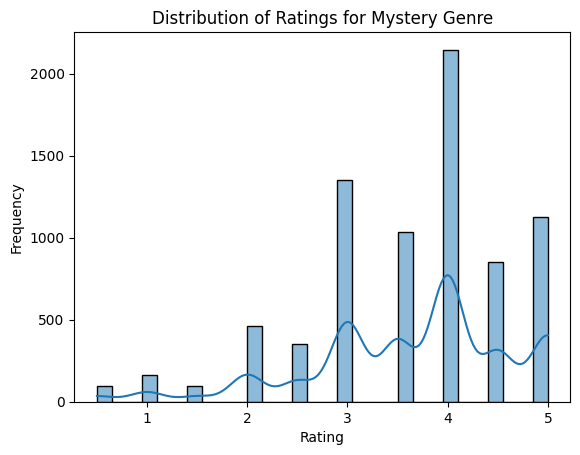

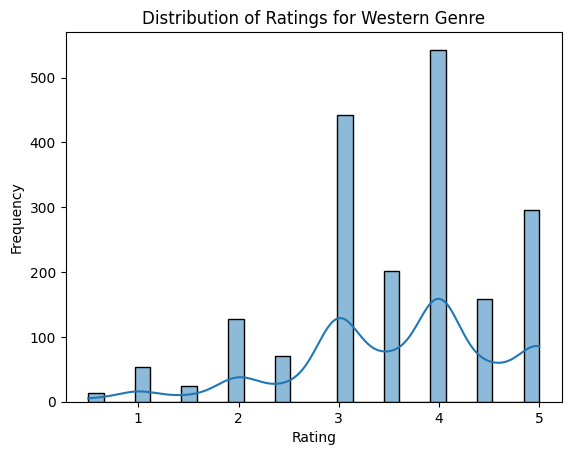

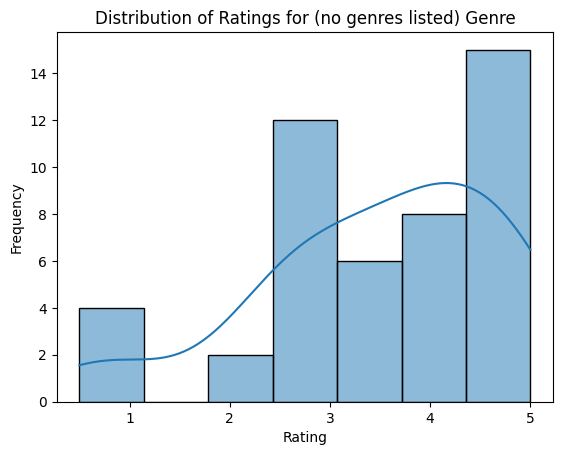

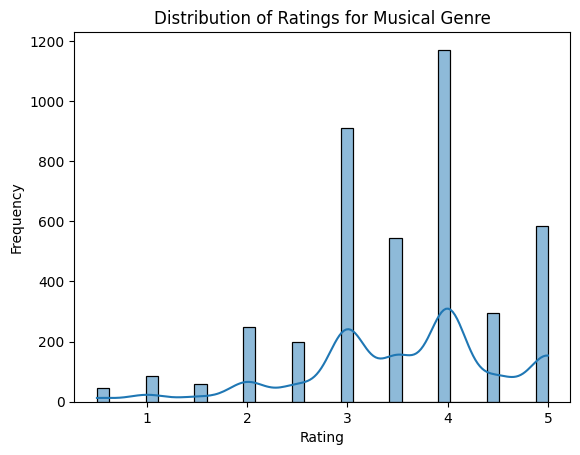

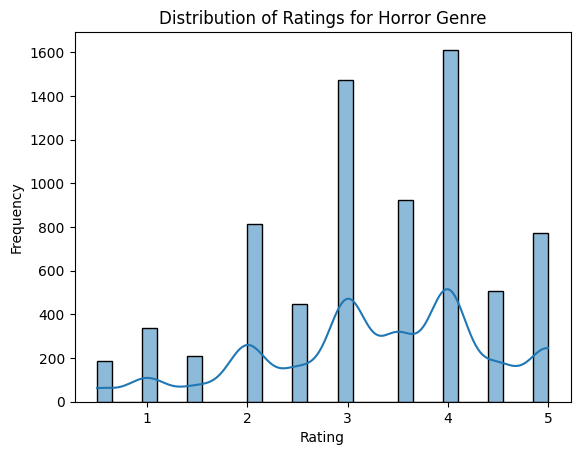

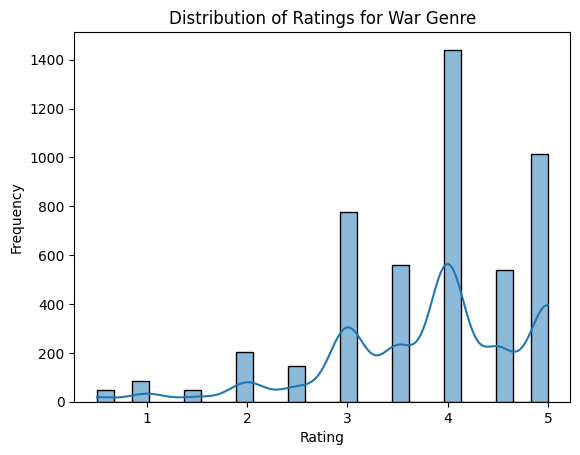

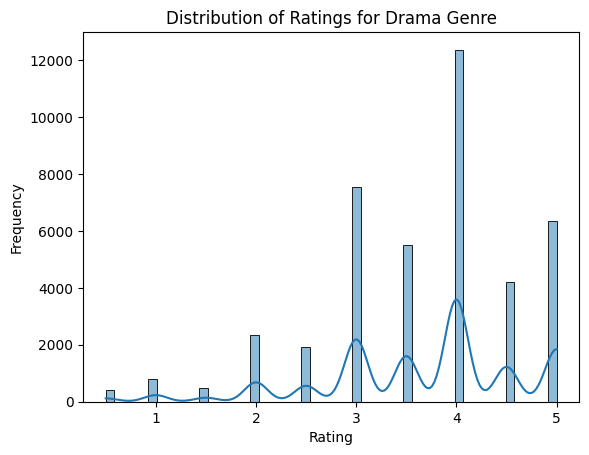

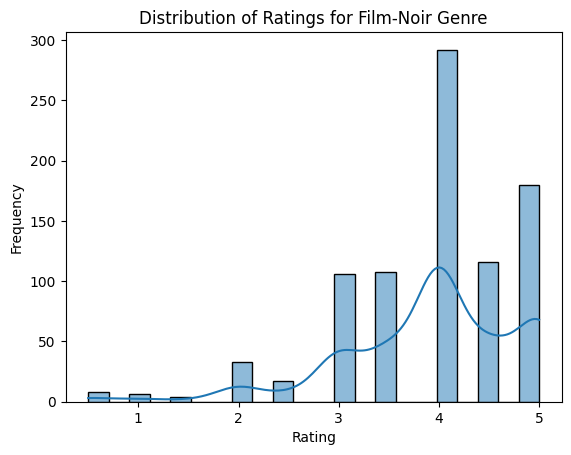

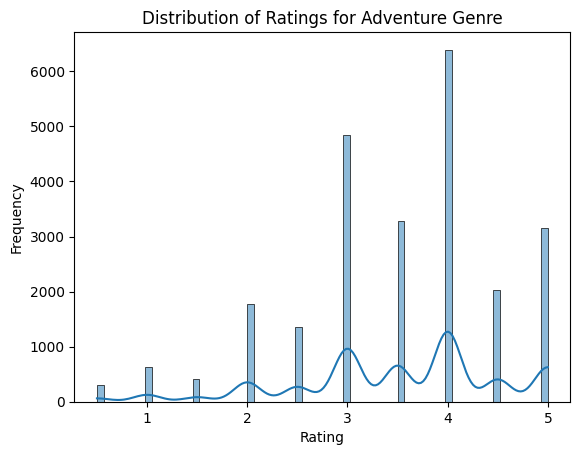

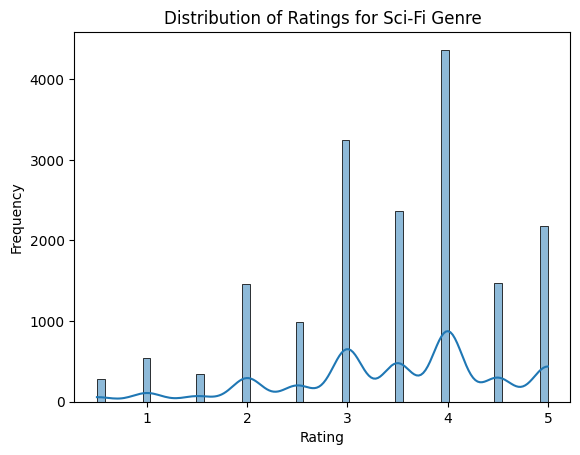

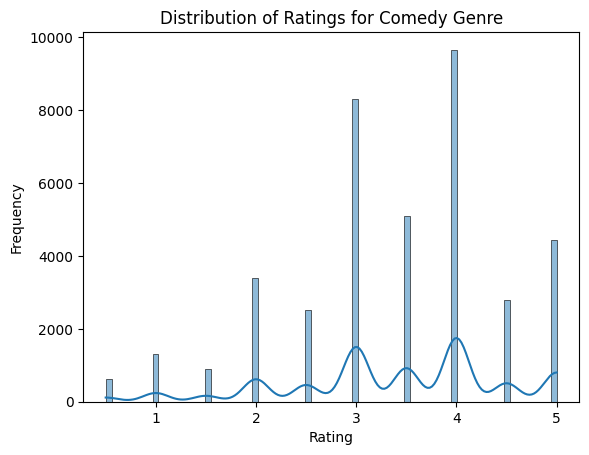

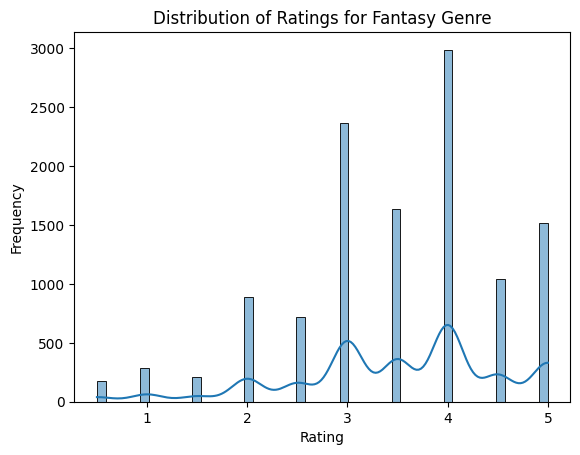

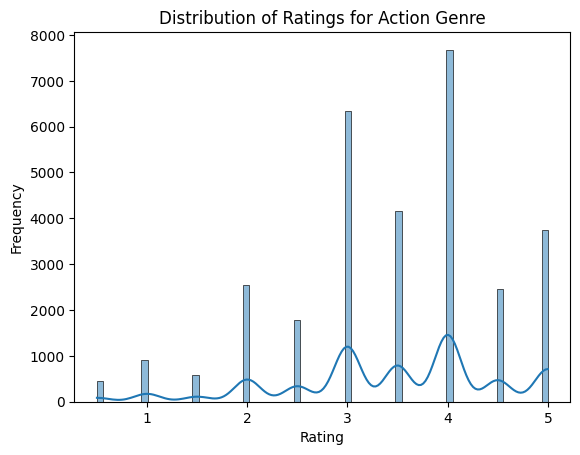

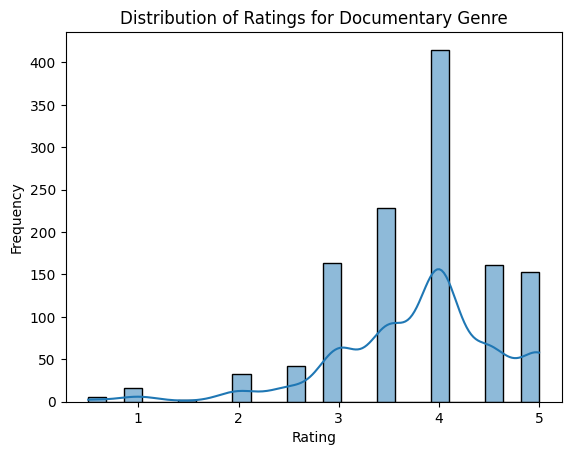

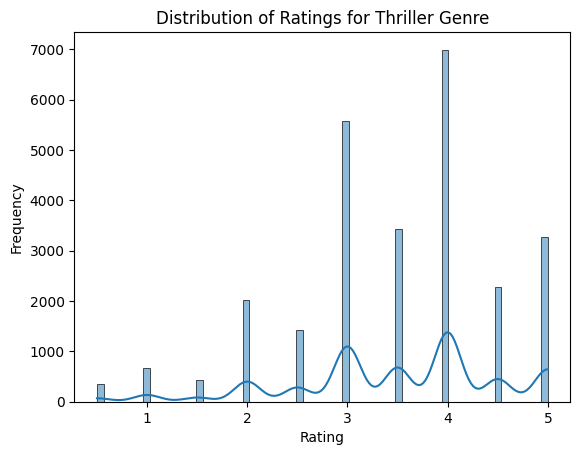

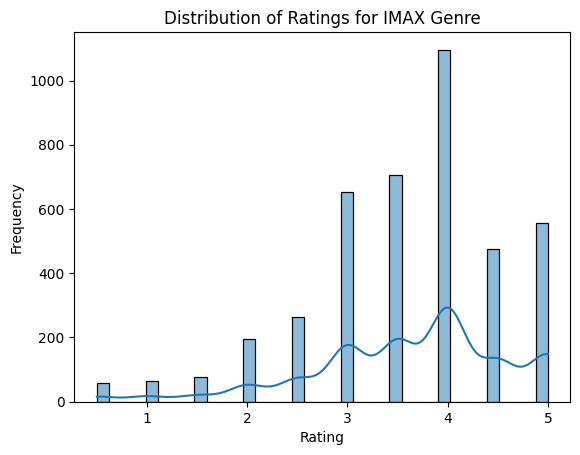

In [29]:
for genre in unique:
    genre_ratings = df[df['genres'].apply(lambda x: genre in x)]['rating']
    
    sns.histplot(genre_ratings, kde=True)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Ratings for {genre} Genre')
    
    plt.show() 

In [30]:
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')


In [31]:
user_matrix = user_item_matrix.fillna(user_item_matrix.mean())


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_matrix)


In [33]:
def get_movie_recommendations(target_user_id, user_similarity, user_matrix, n_recommendations=5):
    if target_user_id not in user_matrix.index:
        return []  
    
    target_user_similarity = user_similarity[user_matrix.index == target_user_id]

    similar_users_indices = target_user_similarity.argsort()[0][::-1]

    rated_movies = user_matrix.loc[target_user_id].dropna().index

    recommendations = []

    for user_index in similar_users_indices:
        if len(recommendations) >= n_recommendations:
            break
        similar_user_rated = user_matrix.iloc[user_index].dropna().index
        new_recommendations = [movie for movie in similar_user_rated if movie not in rated_movies]
        recommendations.extend(new_recommendations)

    return recommendations[:n_recommendations]




In [34]:
target_user_id = 5  
recommendations = get_movie_recommendations(target_user_id, user_similarity, user_item_matrix)

recommended_movies = df[df['movieId'].isin(recommendations)][['movieId', 'title']].drop_duplicates()
print(recommended_movies)

      movieId                                   title
3624      111                      Taxi Driver (1976)
4602      161                     Crimson Tide (1995)
4802      165       Die Hard: With a Vengeance (1995)
5694      208                       Waterworld (1995)
6192      231  Dumb & Dumber (Dumb and Dumber) (1994)


In [35]:
user_id = 5
movies_rated_by_user = df[df['userId'] == user_id][['movieId', 'title', 'rating']]

movies_rated_by_user = movies_rated_by_user.sort_values(by='rating', ascending=False)

print(movies_rated_by_user.head())


       movieId                              title  rating
15876      590          Dances with Wolves (1990)     5.0
13038      475   In the Name of the Father (1993)     5.0
14108      527            Schindler's List (1993)     5.0
2626        58  Postman, The (Postino, Il) (1994)     5.0
16731      596                   Pinocchio (1940)     5.0
